In [18]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [19]:
pdb = '5BWK'
flag = 'fpgb'
increase_factor = 10
num_images = 10000

In [20]:
networkTrue_files = sorted(glob.glob(f'/pscratch/sd/z/zhantao/neurorient_repo/spinifel_benchmark/{pdb.upper()}/networkTrue/{pdb.upper()}_increase{increase_factor:d}_num{int(num_images/1e3)}K_{flag}/*/fsc.txt'))
networkFalse_files = sorted(glob.glob(f'/pscratch/sd/z/zhantao/neurorient_repo/spinifel_benchmark/{pdb.upper()}/networkFalse/{pdb.upper()}_increase{increase_factor:d}_num{int(num_images/1e3)}K_{flag}/*/fsc.txt'))

In [21]:
networkTrue_fsc = []
for _file in networkTrue_files:
    networkTrue_fsc.append(np.loadtxt(_file))
networkTrue_fsc = np.array(networkTrue_fsc)

networkFalse_fsc = []
for _file in networkFalse_files:
    networkFalse_fsc.append(np.loadtxt(_file))
networkFalse_fsc = np.array(networkFalse_fsc)

In [22]:
networkTrue_fsc_best = networkTrue_fsc.min(axis=-1)

In [23]:
networkFalse_fsc_best = networkFalse_fsc.min(axis=-1)

In [24]:
networkTrue_fsc_best[networkTrue_fsc_best < 0] =np.nan
networkFalse_fsc_best[networkFalse_fsc_best < 0] =np.nan
print(networkTrue_fsc_best)
print(networkFalse_fsc_best)

[28.12531991 27.25895055 26.77686395 27.75800469 30.20139398 27.26130089
 27.93732111 27.87794194 27.81481672 28.36162331]
[27.48905202 28.83397068 32.75766562 32.04594584 27.03803589 35.07691014
 39.32893328 37.94470781 30.08389863 25.00542101]


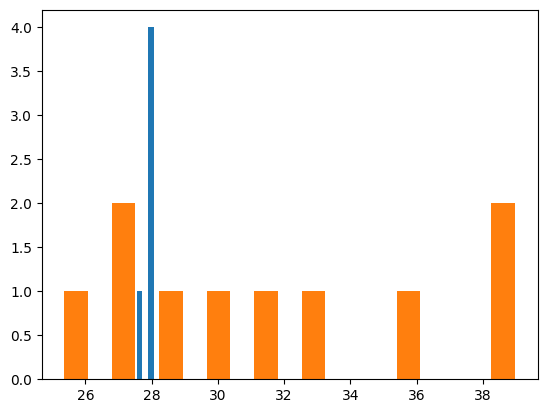

In [25]:
plt.hist(networkTrue_fsc_best, bins=np.sum(~np.isnan(networkTrue_fsc_best)), rwidth=0.5);
plt.hist(networkFalse_fsc_best, bins=np.sum(~np.isnan(networkFalse_fsc_best)), rwidth=0.5);

<Axes: >

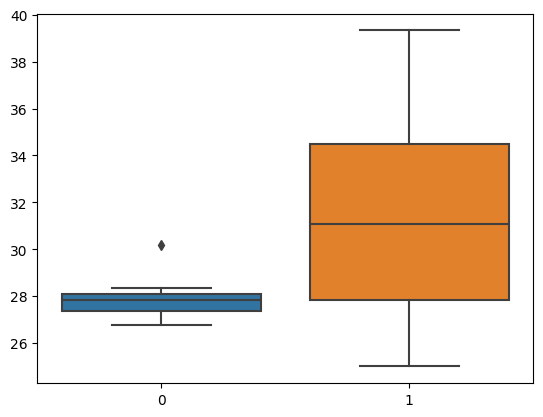

In [26]:
seaborn.boxplot([networkTrue_fsc_best, networkFalse_fsc_best])
# seaborn.violinplot(networkTrue_fsc_best)